In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as spwav
import numpy as np
%matplotlib inline
from IPython.display import display

In [10]:
rate,y = spwav.read("AMajor.wav")
print(rate)
print(len(y))
print(y.dtype)

44100
88200
int16


In [11]:
t = np.linspace(0,len(y)/float(rate),len(y))

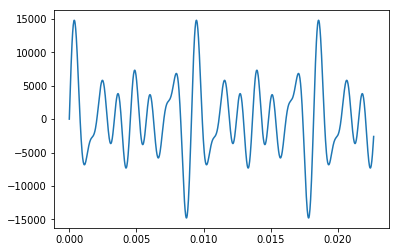

In [12]:
plt.plot(t[0:1000],y[0:1000])

In [18]:
A = np.max(y)
print(A)
y = A*np.sin(440*2*np.pi*t)
y = np.array(y,dtype = "int16")
spwav.write("A440_good.wav",rate,y)

14794


Text(0.5,1,'Bessel Functions')

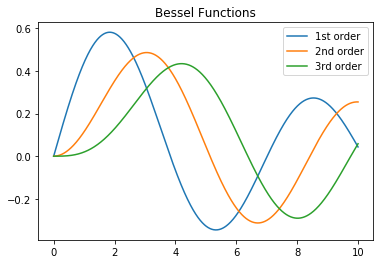

In [21]:
from scipy.special import jn
t = np.linspace(0,10,1000)
plt.plot(t,jn(1,t),t,jn(2,t),t,jn(3,t))
plt.legend(["1st order","2nd order","3rd order"])
plt.title("Bessel Functions")

In [23]:
from scipy import linalg as spla
N = 10
A = np.random.rand(N,N)
b = np.random.rand(N,1)
x = spla.solve(A,b)
print(spla.norm(A.dot(x)-b,2))

1.50597978157e-15


In [24]:
x2 = spla.inv(A).dot(b)
np.allclose(x,x2)

True

In [41]:
from time import time
N = 800
m = 10
ti = 0
tf = 0
t1 = []
t2 = []
r = range(m)
for i in r:
    A = np.random.rand(N,N)
    b = np.random.rand(N,1)
    ti = time()
    x = spla.solve(A,b)
    tf = time()
    t1.append(tf - ti)
    ti = time()
    x = spla.inv(A).dot(b)
    tf = time()
    t2.append(tf - ti)
print("Solve:", min(t1), "s")
print("Inv:", min(t2), "s")

Solve: 0.017153024673461914 s
Inv: 0.023841142654418945 s


In [42]:
from scipy import fftpack as spft


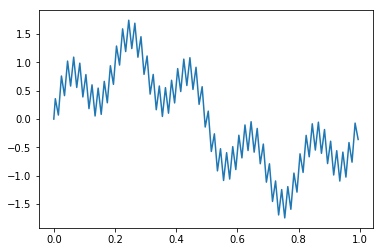

In [43]:
dt = 1./200
t = np.arange(0,1,dt)
a1 = 1
f1 = 1 # Hz
a2 = 0.5
f2 = 5 # Hz
pi = np.pi
a3 = 0.25
f3 = 50
y = a1*np.sin(f1*2 *pi*t)  + a2 * np.sin(f2*2*pi*t) + a3*np.sin(f3*2*pi*t)
plt.plot(t,y)

In [50]:
Y = spft.fft(y)
display(Y) # just a bunch of complex numbers
print(Y.shape)
print(y.shape)

array([  1.40998324e-14 +0.00000000e+00j,
        -5.27164746e-15 -1.00000000e+02j,
         7.44948065e-15 +1.47086767e-14j,
        -2.45459108e-14 -1.05893366e-15j,
         1.69808535e-14 -1.36369921e-14j,
         7.12871503e-15 -5.00000000e+01j,
        -2.20205650e-14 +2.06018294e-14j,
        -1.00832185e-14 -5.97048026e-15j,
        -1.35331297e-14 -1.76553483e-14j,
        -3.79083752e-15 -3.89395376e-15j,
         1.63773822e-14 -2.27279011e-14j,
         2.35604593e-14 +1.55094320e-14j,
        -1.06672486e-14 -2.20695647e-15j,
         5.08403529e-15 +2.53016636e-14j,
        -8.02341873e-15 +6.20266757e-15j,
        -1.31170702e-14 +3.92568806e-15j,
        -8.41007864e-15 -9.19598723e-15j,
        -1.58029234e-14 +7.90648915e-15j,
        -4.01987211e-15 +3.82794266e-15j,
        -3.11675535e-14 +7.96025713e-16j,
         3.53426976e-15 -1.25974330e-14j,
         4.22020585e-15 +1.74868360e-15j,
        -2.28206492e-14 -1.02143854e-14j,
        -6.59463190e-15 -1.1172484

(200,)
(200,)


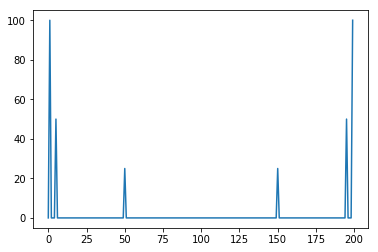

In [34]:
power = abs(Y)  # We're only interested in the magnitudes
plt.plot(power) # This plot uses the integer indices on the X axis. We want frequencies that these powers correspond with.

In [51]:
power

array([  1.40998324e-14,   1.00000000e+02,   1.64875690e-14,
         2.45687419e-14,   2.17788185e-14,   5.00000000e+01,
         3.01552758e-14,   1.17182733e-14,   2.22453798e-14,
         5.43445719e-15,   2.80138562e-14,   2.82070509e-14,
         1.08931560e-14,   2.58073942e-14,   1.01414167e-14,
         1.36919158e-14,   1.24617657e-14,   1.76704544e-14,
         5.55090234e-15,   3.11777172e-14,   1.30838213e-14,
         4.56815408e-15,   2.50023139e-14,   1.29735726e-14,
         2.19050612e-14,   7.58434521e-15,   1.36392670e-14,
         1.32866138e-14,   1.66658704e-14,   3.33455830e-14,
         3.03396430e-14,   4.85884190e-14,   2.77498481e-14,
         4.32383931e-14,   3.72763446e-14,   3.98526693e-14,
         2.01670186e-14,   2.27240897e-14,   1.18010784e-14,
         1.90792709e-14,   2.43343693e-14,   3.26838445e-14,
         3.46027479e-14,   2.66051247e-14,   7.83358802e-15,
         1.18950045e-14,   7.20041670e-15,   2.19091411e-14,
         1.23953053e-14,

In [38]:
all([power[i] == power[-i] for i in range(len(power)//2)]) # symmetric

True

In [52]:
N = len(power)
print(N)
dt = t[1]-t[0]
fs = spft.fftfreq(N,dt)

200


array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99., -100.,  -99.,  -98.,  -97.,  -96.,  -95.,  -94.,  -93.,
        -92.,  -91.,  -90.,  -89.,  -88.,  -87.,  -86.,  -85.,  -84.,
        -83.,  -82.,  -81.,  -80.,  -79.,  -78.,  -77.,  -76.,  -75.,
        -74.,  -73.,

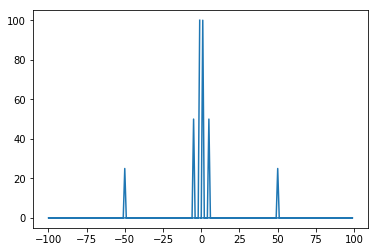

In [53]:
plt.plot(fs,power)
display(fs) # they're in a funny order; 0 - max then -max back to 0

In [54]:
1/(N*dt) # frequencies are just multiples of the sampling frequency

1.0

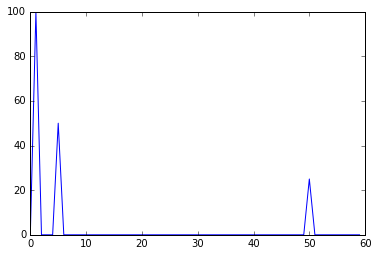

In [115]:
plt.plot(fs[:60],power[:60])